Data Collection: Loading historical data from a CSV file.
Data Preprocessing: Defining features and the target variable, and splitting the dataset into training and testing sets.
Model Training: Initializing and training a linear regression model using the training data.
Model Evaluation: Making predictions on the test set and evaluating the model's performance.
Future Prediction: Defining future data and predicting future stock prices using the trained model.
Plotting: Visualizing the actual and predicted stock prices over time, including future predictions.

This program performs the following tasks:
This for the program down below.

Loads the dataset from the 'company_data.csv' file.
Extracts features and the target variable from the dataset.
Defines different regression models for evaluation.
Performs cross-validation to evaluate each model's performance using R-squared score.
Selects the best performing model based on the R-squared score.
Splits the data into training and testing sets.
Trains the best model on the training data and evaluates it on the test data.
Calculates and prints the Mean Squared Error, R-squared, and accuracy percentage of the best model.
Makes predictions on the test data and prints them.
Plots actual vs predicted stock prices on the test data for visual comparison.

Linear Regression - R-squared: -0.0852604054662386
Decision Tree Regression - R-squared: -0.9339165766028973
Random Forest Regression - R-squared: -0.22369798518502676
Best Model - Mean Squared Error: 4222.67471207716
Best Model - R-squared: -74.0697726591495
Accuracy Percentage: -7406.97726591495%
Predicted Stock Prices on Test Data:
[164.60475233 174.24907137]


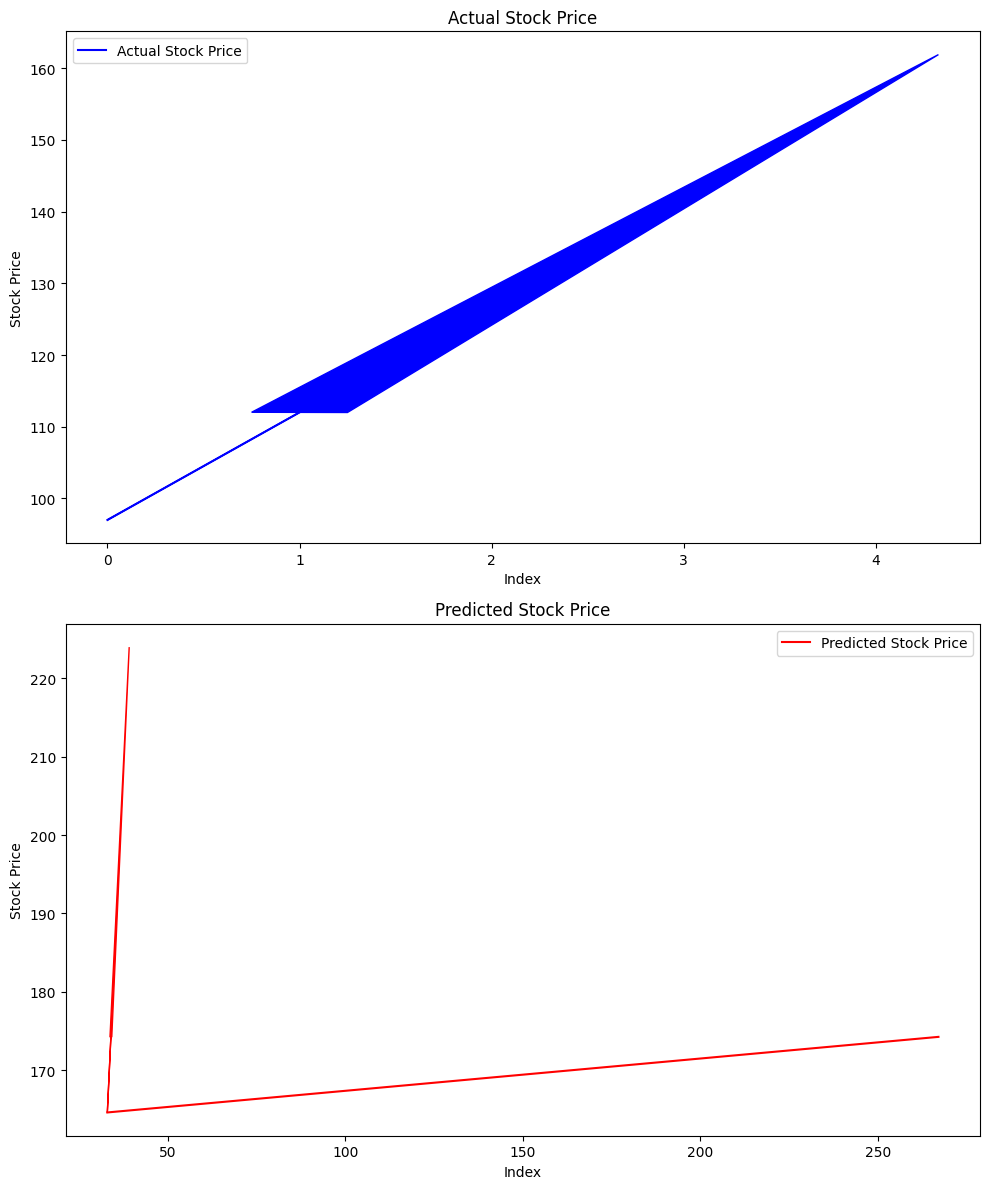

In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

try:
    # Load the dataset from 'company_data.csv' file
    data = pd.read_csv('company_data.csv')
except FileNotFoundError:
    print("Error: 'company_data.csv' file not found.")
    exit()

# Extracting features and target variable
X = data[['Employees', 'Profits']]  # Features
y = data['Stock_Price']             # Target variable

# Defining models for evaluation
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor()
}

best_model = None
best_accuracy = -1

# Loop over models, perform cross-validation, and select the best model based on R-squared score
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=8, scoring='r2')
    accuracy = scores.mean()
    print(f'{name} - R-squared: {accuracy}')
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=2, random_state=38)

# Training the best model on the training data
best_model.fit(X_train, y_train)

# Evaluating the best model on the test data
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f'Best Model - Mean Squared Error: {mse}')
print(f'Best Model - R-squared: {r_squared}')

# Calculating accuracy percentage
accuracy_percentage = r_squared * 100
print(f'Accuracy Percentage: {accuracy_percentage}%')

# Making predictions on the test data
prediction = best_model.predict(X_test)
print("Predicted Stock Prices on Test Data:")
print(prediction)

# Plotting actual vs predicted stock prices
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))
y_test_reset_index = y_test.reset_index(drop=True)  # Reset index to ensure it starts from 0
axes[0].plot(y_test_reset_index.index, y_test_reset_index, label='Actual Stock Price', color='blue')
for i in range(len(y_test_reset_index)-1):
    axes[0].arrow(y_test_reset_index.index[i], y_test_reset_index[i], 1, y_test_reset_index[i+1] - y_test_reset_index[i], head_width=0.5, head_length=50, fc='blue', ec='blue')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Stock Price')
axes[0].set_title('Actual Stock Price')
axes[0].legend()

axes[1].plot(y_test.index, prediction, label='Predicted Stock Price', color='red')
for i in range(len(prediction)-1):
    axes[1].arrow(y_test.index[i], prediction[i], 1, prediction[i+1] - prediction[i], head_width=0.5, head_length=50, fc='red', ec='red')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Stock Price')
axes[1].set_title('Predicted Stock Price')
axes[1].legend()

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
